<h1>Keras Regression Code Along</h1>

<h2>Exploratory Data Analysis</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\axel.coronado\AppData\Local\Temp\ipykernel_21344\1203877565.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\axel.coronado\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

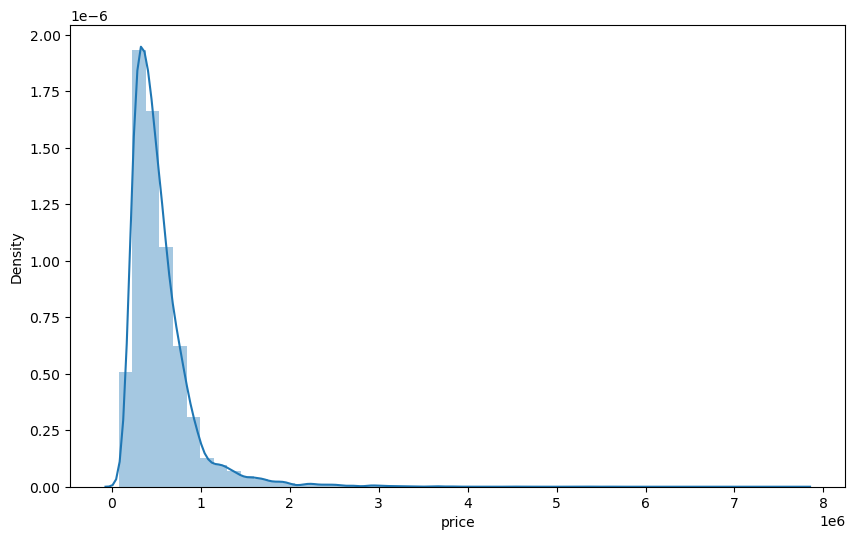

In [8]:
plt.figure(figsize=(10, 6))
sns.distplot(df['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

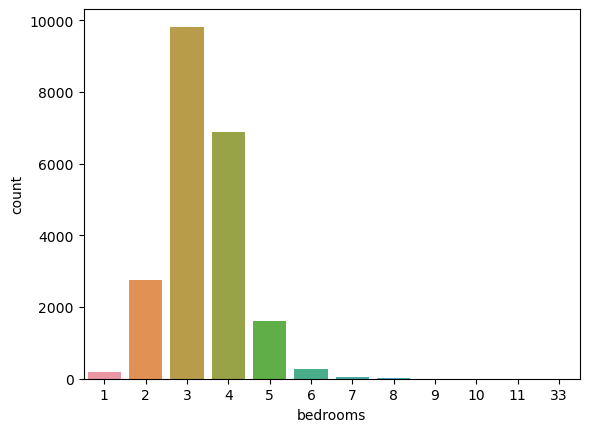

In [10]:
sns.countplot(data=df, x='bedrooms')

In [12]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [13]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

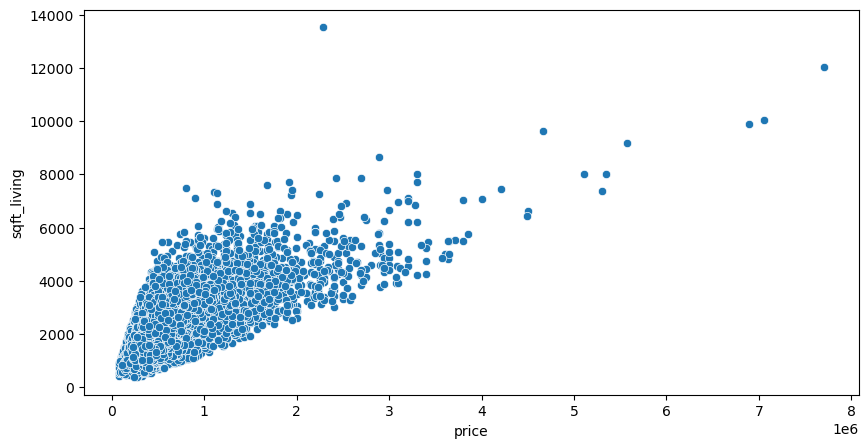

In [15]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='price', y='sqft_living')

<Axes: xlabel='bedrooms', ylabel='price'>

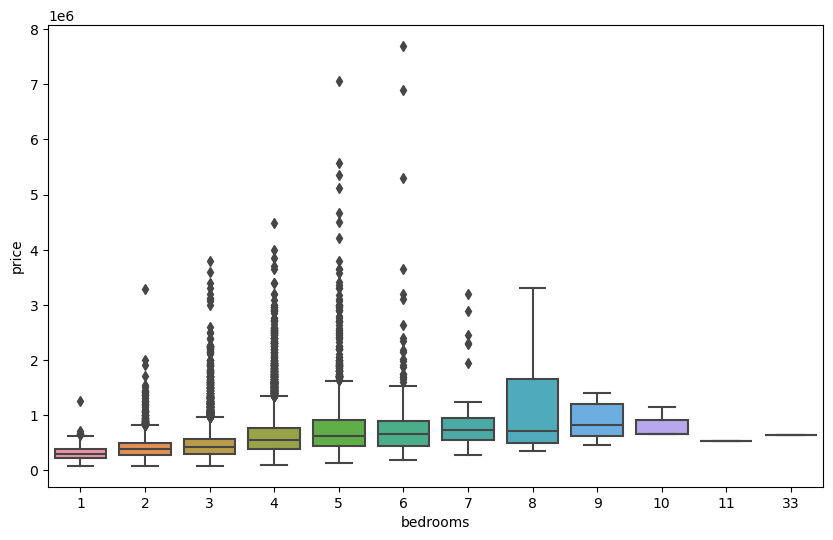

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bedrooms', y='price')

<Axes: xlabel='price', ylabel='long'>

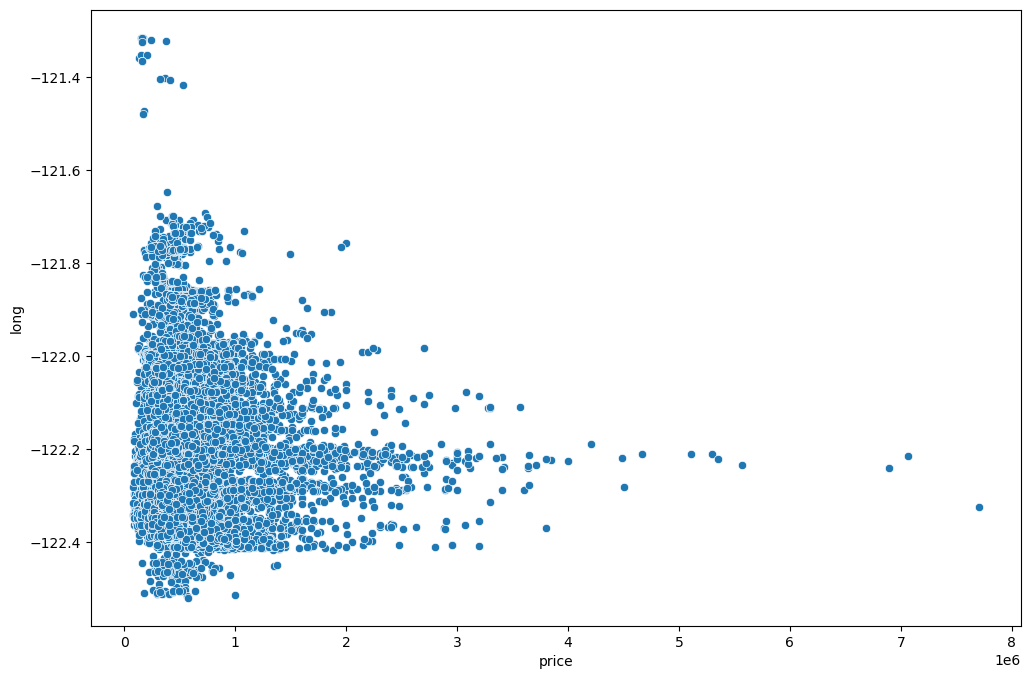

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='price', y='long')

<Axes: xlabel='price', ylabel='lat'>

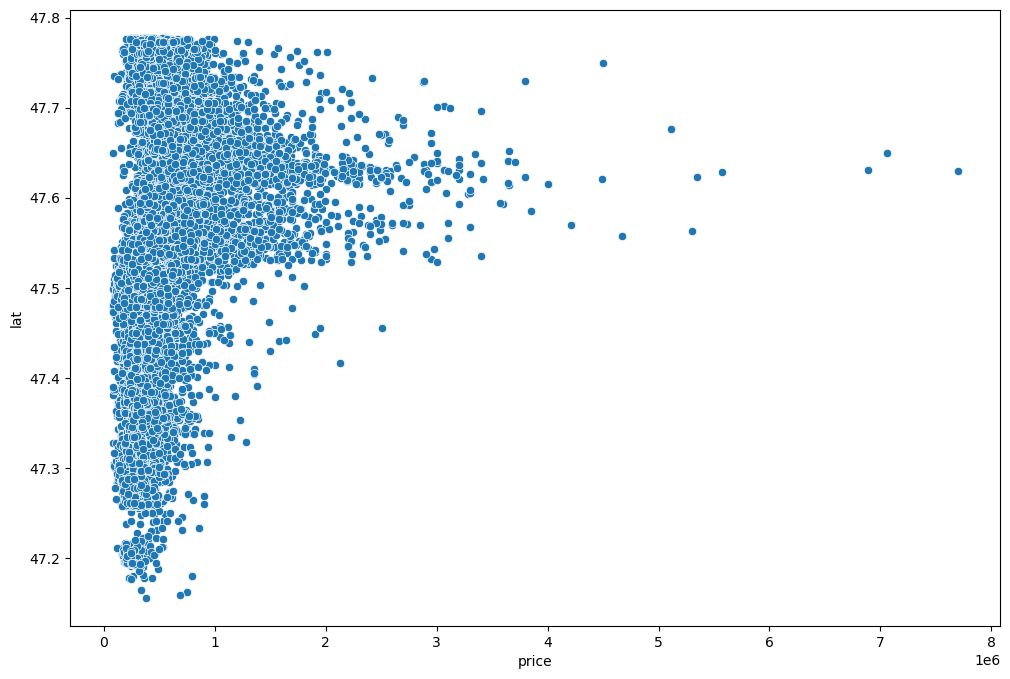

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='price', y='lat')

<Axes: xlabel='long', ylabel='lat'>

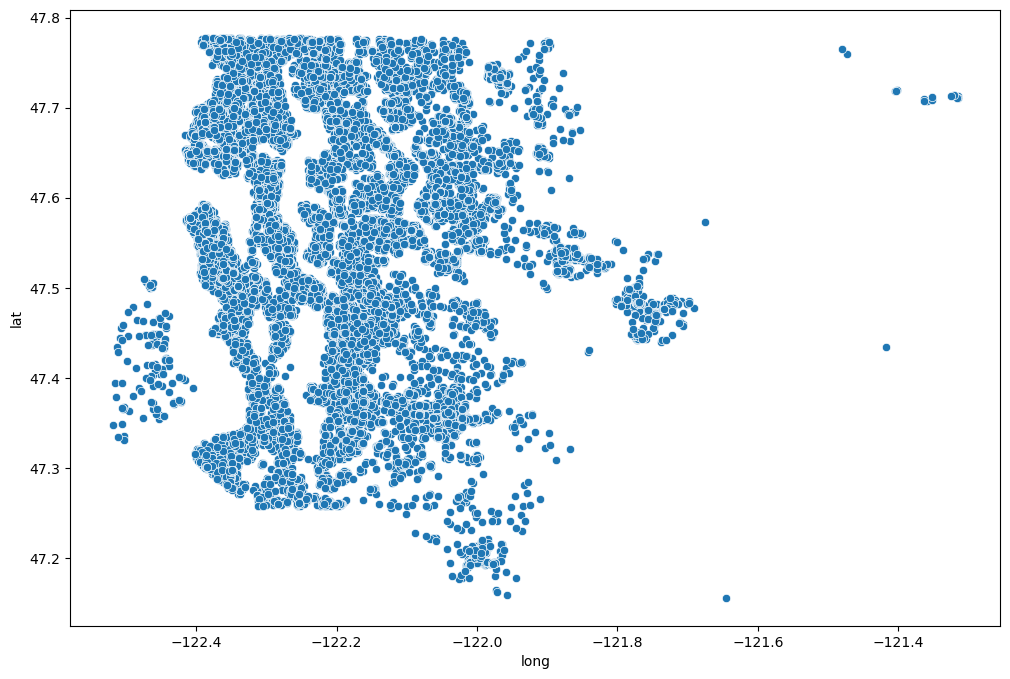

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='long', y='lat')

<Axes: xlabel='long', ylabel='lat'>

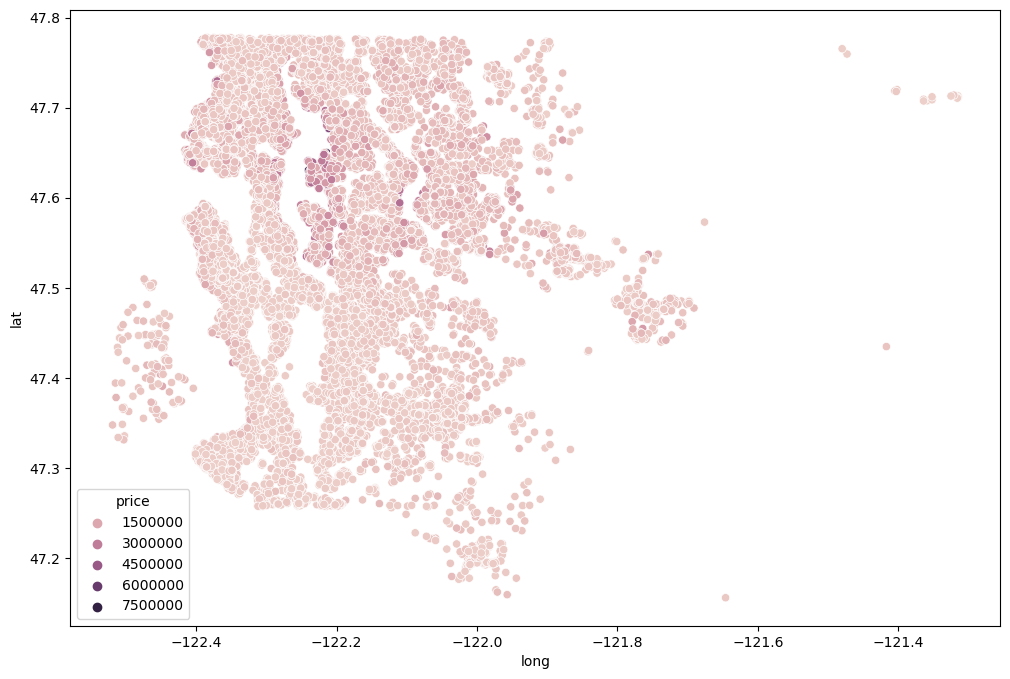

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='long', y='lat', hue='price')

In [21]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [23]:
len(df)*0.01

215.97

In [24]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

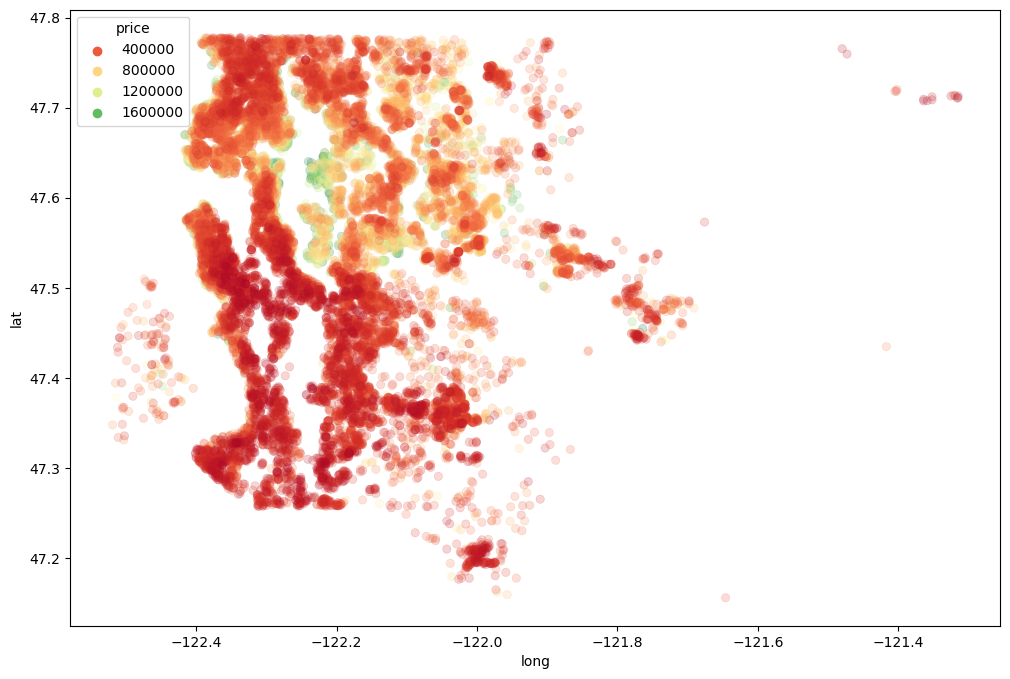

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=non_top_1_perc, x='long', y='lat', hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn')

<Axes: xlabel='waterfront', ylabel='price'>

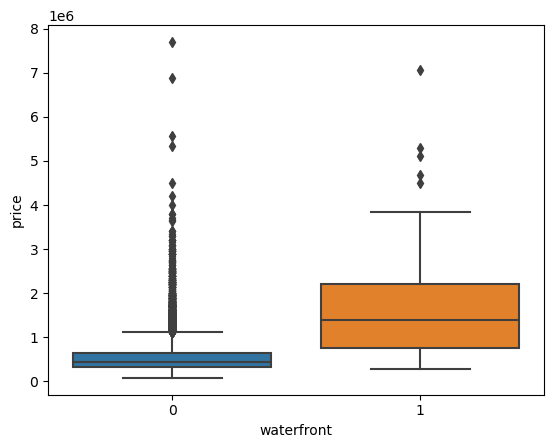

In [27]:
sns.boxplot(data=df, x='waterfront', y='price')

In [28]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
df = df.drop('id', axis=1)

In [30]:
df['date'] = pd.to_datetime(df['date'])

In [31]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

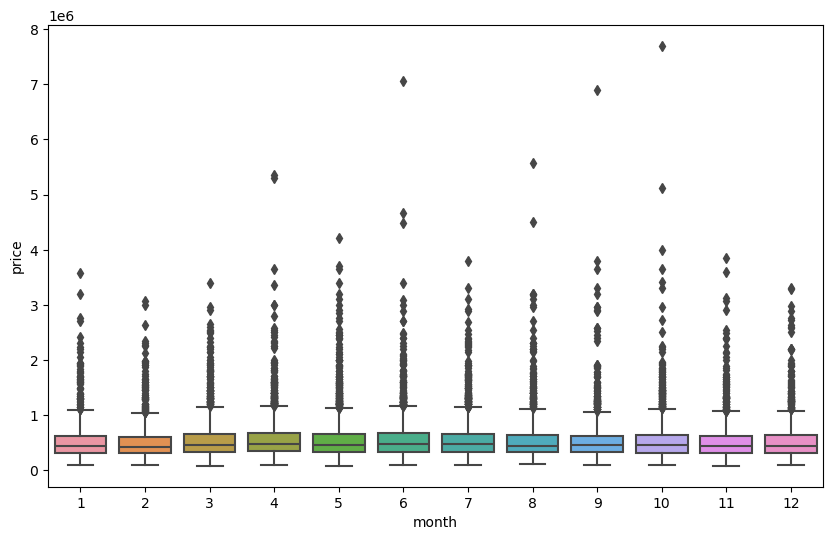

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='month', y='price')

In [34]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<Axes: xlabel='month'>

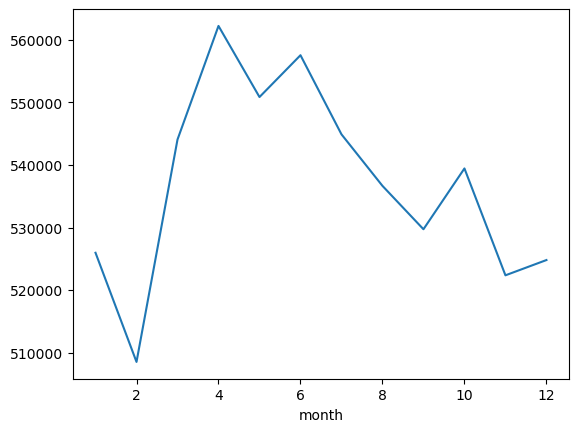

In [35]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

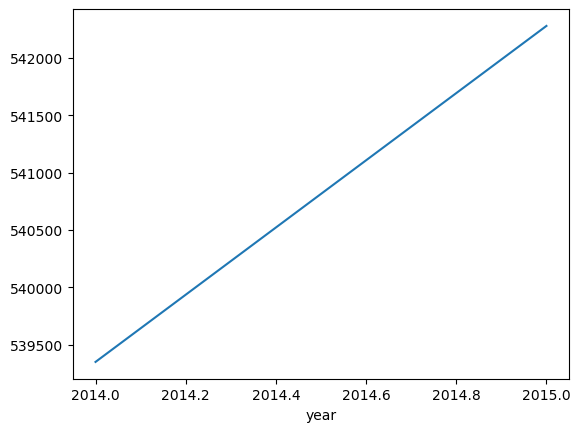

In [36]:
df.groupby('year').mean()['price'].plot()

In [37]:
df = df.drop('date', axis=1)

In [38]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [39]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [40]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [41]:
df = df.drop('zipcode', axis=1)

In [42]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [43]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

<h2>Data Preprocessing and Creating a Model</h2>

In [44]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
X_train = scaler.fit_transform(X_train)

In [50]:
X_test = scaler.transform(X_test)

In [51]:
from tensorflow.keras.models import Sequential

In [52]:
from tensorflow.keras.layers import Dense

In [54]:
X_train.shape

(15117, 19)

In [56]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [57]:
model.fit(
    x=X_train, 
    y=y_train, 
    validation_data=(X_test, y_test), 
    batch_size=128,
    epochs=400
)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 433919033344.0000 - val_loss: 418835529728.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 428410109952.0000 - val_loss: 411577843712.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 419313549312.0000 - val_loss: 353159905280.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 317130047488.0000 - val_loss: 189926096896.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 165057265664.0000 - val_loss: 97301176320.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 102487490560.0000 - val_loss: 93734076416.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96453279744.0000 - val_loss: 92158435328.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94554718208.0000 - val_loss: 90389807104.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 96173170688.0000 - val_loss: 88575008768.0000
Epoch 10/400
119/119 ━━━━━━

<h2>Model Evaluation and Predictions</h2>

In [58]:
model.history.history

{'loss': [430227652608.0,
  428081053696.0,
  401363042304.0,
  288101924864.0,
  134758490112.0,
  98264965120.0,
  96011337728.0,
  94208458752.0,
  92378357760.0,
  90532454400.0,
  88547049472.0,
  86559850496.0,
  84429848576.0,
  82240823296.0,
  79995527168.0,
  77604085760.0,
  75146223616.0,
  72620736512.0,
  70022389760.0,
  67360595968.0,
  64743403520.0,
  62221029376.0,
  59807399936.0,
  57615958016.0,
  55842484224.0,
  54230163456.0,
  52955660288.0,
  51880259584.0,
  50986385408.0,
  50242076672.0,
  49478819840.0,
  48921464832.0,
  48384200704.0,
  47913316352.0,
  47456571392.0,
  47079440384.0,
  46707011584.0,
  46293405696.0,
  45957074944.0,
  45593698304.0,
  45219618816.0,
  44835110912.0,
  44481282048.0,
  44109332480.0,
  43770884096.0,
  43413270528.0,
  43079208960.0,
  42776748032.0,
  42478514176.0,
  42182348800.0,
  41892450304.0,
  41592168448.0,
  41279295488.0,
  41027002368.0,
  40728870912.0,
  40443961344.0,
  40163336192.0,
  39881596928.0,
 

In [59]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302277e+11,4.188355e+11
1,4.280811e+11,4.115778e+11
2,4.013630e+11,3.531599e+11
3,2.881019e+11,1.899261e+11
4,1.347585e+11,9.730118e+10
...,...,...
395,2.944856e+10,2.718686e+10
396,2.948332e+10,2.712074e+10
397,2.944504e+10,2.707088e+10
398,2.943609e+10,2.713745e+10


<Axes: >

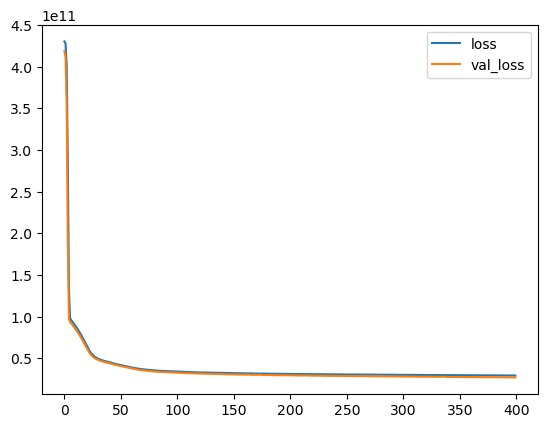

In [61]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [63]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [64]:
predictions

array([[402786.06],
       [579909.06],
       [566915.06],
       ...,
       [380818.8 ],
       [572922.94],
       [669236.75]], dtype=float32)

In [65]:
mean_squared_error(y_test, predictions)

27067076761.810204

In [66]:
np.sqrt(mean_squared_error(y_test, predictions))

164520.7487273572

In [67]:
mean_absolute_error(y_test, predictions)

101611.737920163

In [68]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [69]:
explained_variance_score(y_test, predictions)

0.7959277202465107

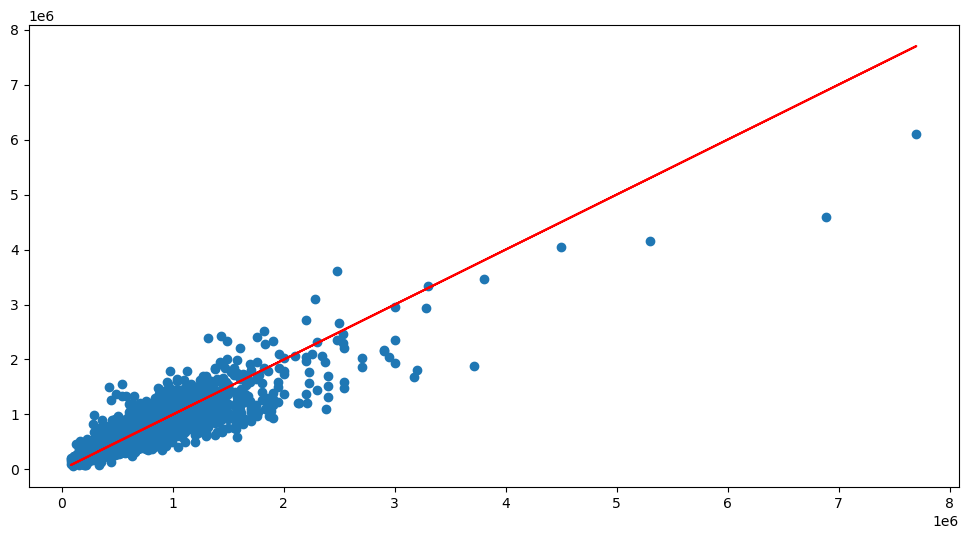

In [72]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [74]:
single_house = df.drop('price', axis=1).iloc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [75]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [76]:
single_house.values.reshape(-1, 19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [78]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [79]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[287440.62]], dtype=float32)

In [80]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


<h2>EDA and Preprocessing</h2>
<p>
    This lecture will show how to perform a classification task with TensorFlow. We will also focus on how to identify and deal with overfitting through Early Stopping Callbacks and Dropout Layers.
</p>
<p>
    Early Stopping
    <br>Keras can automatically stop training based on a loss condition on the validation data passed during the model.fit() call.
</p>
<p>
    Dropout Layers
    <br>Dropout can be added to layers to "turn off" neurons during training to prevent overfitting. Each Dropout layer will "drop" a user-defined percentage of neuron units in the previous layer every batch.
</p>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [85]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

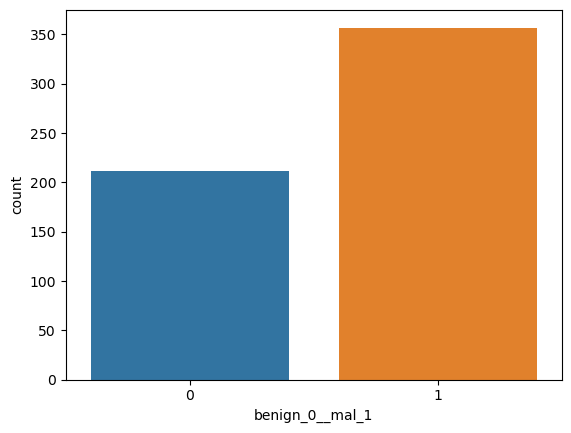

In [88]:
sns.countplot(data=df, x='benign_0__mal_1')

In [89]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [91]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

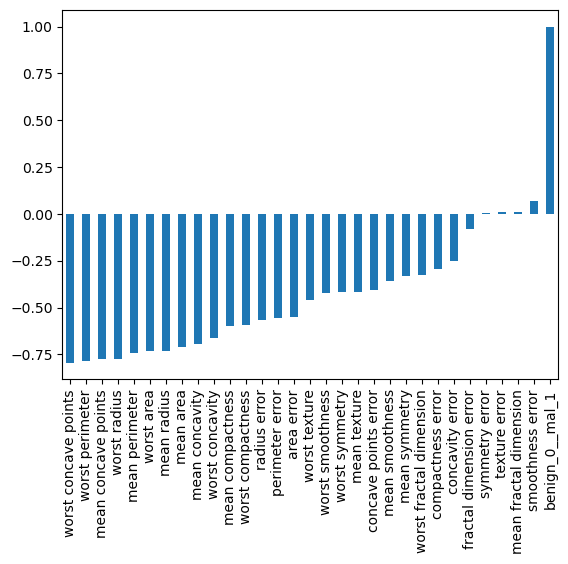

In [92]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

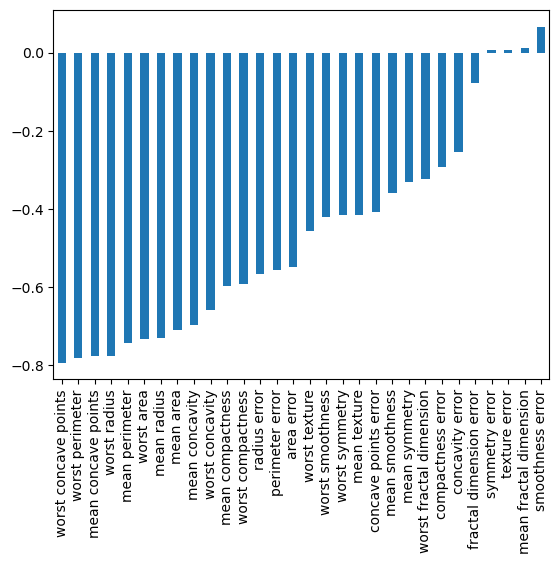

In [93]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

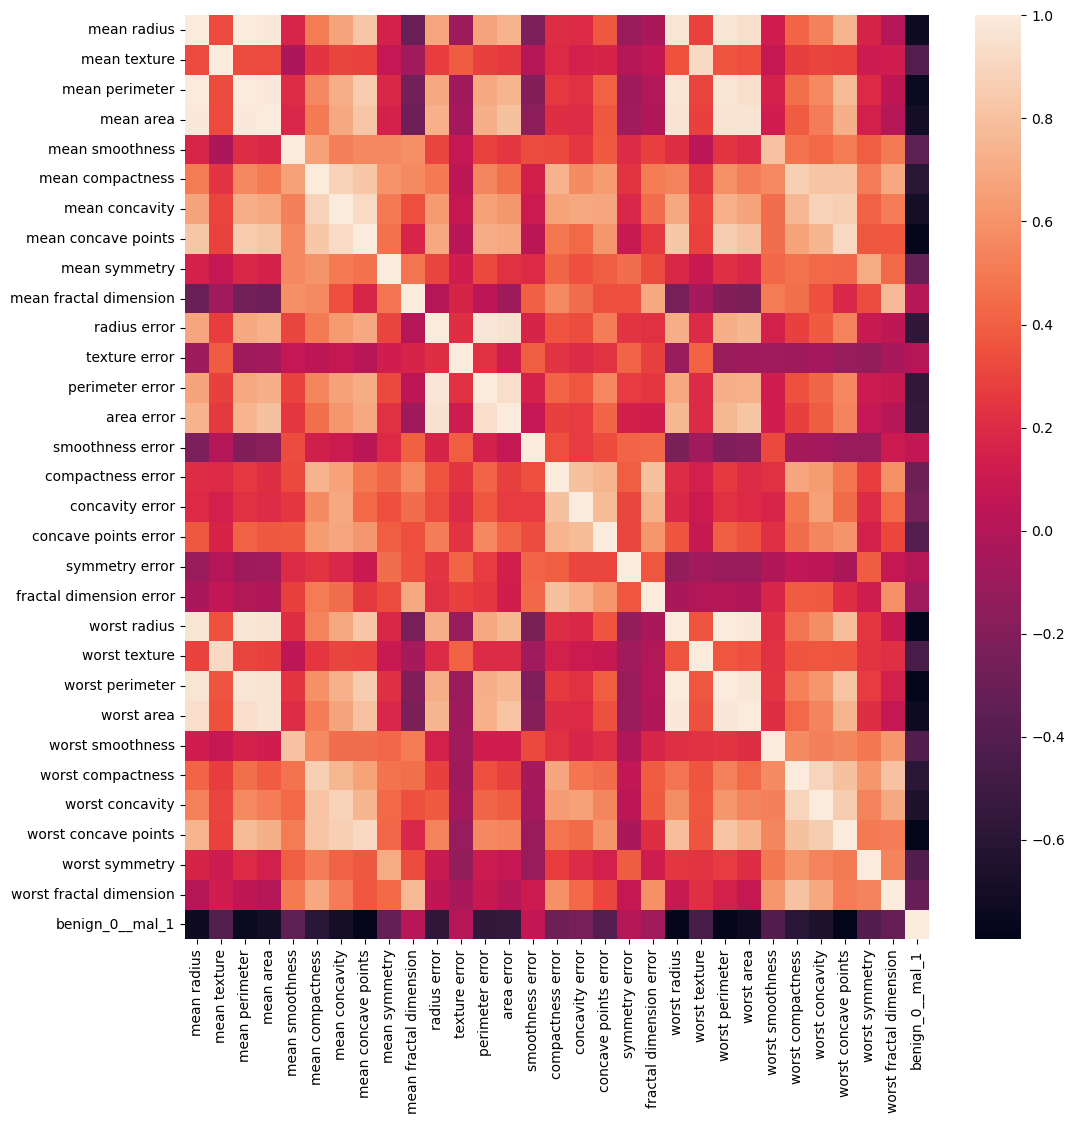

In [95]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr())

In [96]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()

In [102]:
X_train = scaler.fit_transform(X_train)

In [103]:
X_test = scaler.transform(X_test)

<h2>Keras Classification</h2>

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [105]:
X_train.shape

(426, 30)

In [107]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [108]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.6869 - val_loss: 0.6722
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6648 - val_loss: 0.6517
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6429 - val_loss: 0.6280
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6170 - val_loss: 0.5990
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5874 - val_loss: 0.5613
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5438 - val_loss: 0.5120
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5044 - val_loss: 0.4638
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4642 - val_loss: 0.4125
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4139 - val_loss: 0.3665
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3494 - val_loss: 0.3252
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3315 - val_loss: 0.2933
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

In [109]:
losses = pd.DataFrame(model.history.history)

<Axes: >

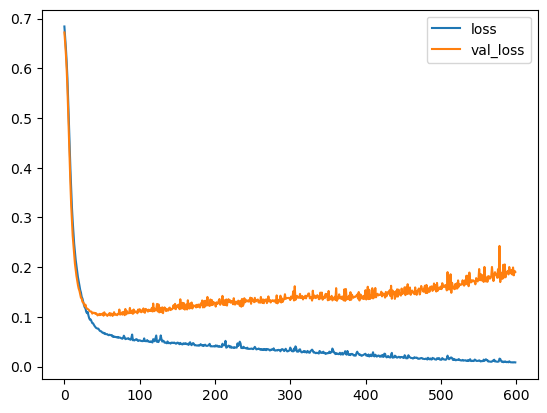

In [110]:
losses.plot()

In [111]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [112]:
from tensorflow.keras.callbacks import EarlyStopping

In [113]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks.early_stopping:

class EarlyStopping(keras.src.callbacks.callback.Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |      monitor: Quantity to be monitored. Defaults 

In [114]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [115]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.6725 - val_loss: 0.6477
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6427 - val_loss: 0.6150
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6028 - val_loss: 0.5737
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5605 - val_loss: 0.5263
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5106 - val_loss: 0.4724
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4668 - val_loss: 0.4150
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4033 - val_loss: 0.3649
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3494 - val_loss: 0.3293
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3221 - val_loss: 0.2969
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2748 - val_loss: 0.2701
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2811 - val_loss: 0.2473
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

<Axes: >

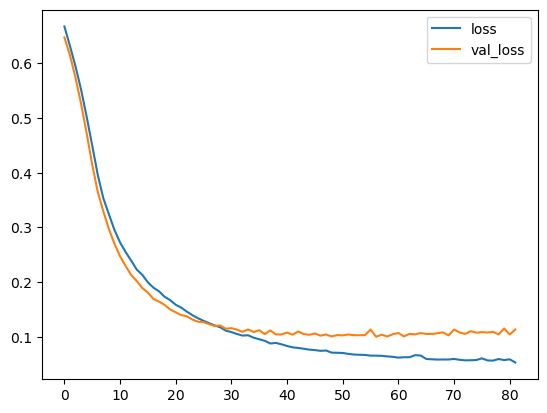

In [116]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [117]:
from tensorflow.keras.layers import Dropout

In [118]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [119]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.7112 - val_loss: 0.6612
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6660 - val_loss: 0.6435
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6596 - val_loss: 0.6254
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6471 - val_loss: 0.6061
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6261 - val_loss: 0.5877
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6079 - val_loss: 0.5674
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5821 - val_loss: 0.5483
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5707 - val_loss: 0.5250
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5590 - val_loss: 0.5031
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5676 - val_loss: 0.4801
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5037 - val_loss: 0.4505
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0

In [120]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

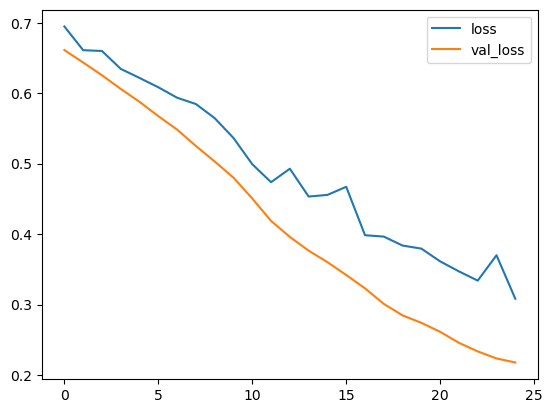

In [121]:
model_loss.plot()

In [126]:
predictions = (model.predict(X_test) > 0.5)*1
predictions

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [127]:
from sklearn.metrics import classification_report, confusion_matrix

In [128]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        55
           1       0.94      1.00      0.97        88

    accuracy                           0.96       143
   macro avg       0.97      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [129]:
print(confusion_matrix(y_test, predictions))

[[49  6]
 [ 0 88]]
